# Brain Tumor Classification using Deep Learning
# _______________________________________________
##  Building, Training, and Evaluating a Convolutional Neural Network for Brain Tumor Classification with Image Data

______________________________________________________________________________________________________________________________________________________________________________________

* This cell is responsible for importing all the necessary libraries and modules that will be used in the code.

* **"numpy"** is imported for numerical computations.
* **"tensorflow"** is imported as tf for deep learning functionalities.
* ** Sequential model*, various layers (e.g., **Conv2D**, **Dense**), **Dropout**, and **MaxPooling2D** are imported from **"tensorflow.keras.models"** and **"tensorflow.keras.layers"**
* **Adam** optimizer is imported from **tensorflow.keras.optimizers**.
* **ImageDataGenerator** is imported from **tensorflow.keras.preprocessing.image** for data augmentation.
* Various **evaluation** metrics such as **classification_report**, **confusion_matrix**, **precision_score**, **recall_score**, **f1_score**, and **roc_auc_score** are imported from **sklearn.metrics.**

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

* In this cell, we define parameters related to image data, such as image width, height, and number of color channels **(input_shape)**.
* We also specify the number of classes **(num_classes)**, assuming there are three classes: glioma, meningioma, and pituitary.
* Additionally, we set the directories where the training and validation data are located **(train_data_dir** and **validation_data_dir)**   .
* **batch_size** determines the number of samples per gradient update during training.
* **epochs** specify the number of epochs for training the model.

In [7]:
# Setting Image Data Parameters and Directories
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)  # Assuming RGB images
num_classes = 3  # glioma, meningioma, pituitary

# Data directories
train_data_dir = 'C:/Users/rakha_1/Downloads/enhance_data_adaptive_clahe/enhance_data/training'
validation_data_dir = 'C:/Users/rakha_1/Downloads/enhance_data_adaptive_clahe/enhance_data/validation'
batch_size = 32
epochs = 45


* This cell creates data generators for both training and validation data using the **ImageDataGenerator**.
* For the training data generator **(train_datagen)**, we apply rescaling, shearing, zooming, and horizontal flipping as data augmentation techniques.
* For the validation data generator **(val_datagen)**, we only perform rescaling.
* We then use the **flow_from_directory** method to load images from the specified directories, set the target size, batch size, class mode, and shuffle mode for both generators.

In [8]:
# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 2144 images belonging to 3 classes.
Found 459 images belonging to 3 classes.


* This cell defines the architecture of the neural network model using the **Sequential** API from Keras.
* It consists of multiple convolutional layers **(Conv2D)**, each followed by a max-pooling layer **(MaxPooling2D)** to downsample the features.
* We also add dropout layers **(Dropout)** to prevent overfitting during training.
* The model is compiled with the Adam optimizer, categorical crossentropy loss function, and accuracy metric for evaluation.

In [9]:
# Deep Learning Model Definition and Compilation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu'),  # Add more layers
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),  # Increase layer width
    Dropout(0.5),
    Dense(256, activation='relu'),  # Increase layer width
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


* This cell trains the compiled model using the **fit** method.
* We pass the training data generator **(train_generator)**, validation data generator **(validation_generator)**, number of training steps per epoch, number of epochs, and validation steps per epoch.

In [11]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/45
67/67 [==============================] - 48s 722ms/step - loss: 0.9789 - accuracy: 0.5140 - val_loss: 1.0762 - val_accuracy: 0.4598
Epoch 2/45
67/67 [==============================] - 32s 484ms/step - loss: 0.9225 - accuracy: 0.5602 - val_loss: 1.1062 - val_accuracy: 0.4554
Epoch 3/45
67/67 [==============================] - 33s 486ms/step - loss: 0.9024 - accuracy: 0.5644 - val_loss: 1.0846 - val_accuracy: 0.4554
Epoch 4/45
67/67 [==============================] - 32s 484ms/step - loss: 0.8816 - accuracy: 0.5849 - val_loss: 1.0489 - val_accuracy: 0.4353
Epoch 5/45
67/67 [==============================] - 32s 483ms/step - loss: 0.8436 - accuracy: 0.6245 - val_loss: 1.0587 - val_accuracy: 0.4844
Epoch 6/45
67/67 [==============================] - 33s 485ms/step - loss: 0.7875 - accuracy: 0.6497 - val_loss: 0.9751 - val_accuracy: 0.5513
Epoch 7/45
67/67 [==============================] - 32s 482ms/step - loss: 0.7465 - accuracy: 0.6665 - val_loss: 1.0906 - val_accuracy: 0.5312

* This cell evaluates the trained model on the validation data by calculating the loss and accuracy using the **evaluate** method.
* It also predicts probabilities for the validation data and extracts the predicted labels **(y_pred)**.
* The true labels are retrieved from the validation data generator.

In [12]:
# Evaluation on validation data (Part 1)
val_loss, val_accuracy = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Predict probabilities for validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
true_labels = validation_generator.classes


15/15 [==============================] - 3s 175ms/step - loss: 1.5962 - accuracy: 0.6296
Validation Loss: 1.5962294340133667
Validation Accuracy: 0.6296296119689941
15/15 [==============================] - 3s 171ms/step


* Here, we generate a classification report using the **classification_report** function from scikit-learn, which includes precision, recall, and F1-score for each class.
* We also compute and print the confusion matrix using the **confusion_matrix** function.

In [13]:
# Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(true_labels, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)



Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.40      0.43       214
           1       0.18      0.25      0.21       106
           2       0.26      0.24      0.25       139

    accuracy                           0.32       459
   macro avg       0.30      0.30      0.30       459
weighted avg       0.34      0.32      0.33       459


Confusion Matrix:
[[85 69 60]
 [43 27 36]
 [49 57 33]]


* This cell calculates and prints **precision**, **recall**, and **F1-score** using the corresponding functions from scikit-learn.
* These metrics provide additional insights into the model's performance beyond accuracy.

In [14]:
# Precision, Recall, and F1-Score
precision = precision_score(true_labels, y_pred, average='weighted')
print("\nPrecision:", precision)

recall = recall_score(true_labels, y_pred, average='weighted')
print("Recall:", recall)

f1 = f1_score(true_labels, y_pred, average='weighted')
print("F1-Score:", f1)



Precision: 0.34211848250489285
Recall: 0.3159041394335512
F1-Score: 0.325436182232762


In [20]:
def specificity_score(true_labels, predicted_labels):
    true_negative = 0
    false_positive = 0
    for true, pred in zip(true_labels, predicted_labels):
        if true == 0 and pred == 0:
            true_negative += 1
        elif true == 0 and pred == 1:
            false_positive += 1
    return true_negative / (true_negative + false_positive)


* This cell computes and prints the **ROC-AUC** score using the **'roc_auc_score'** function from scikit-learn.
* Additionally, it calculates and prints specificity, "**false positive rate (FPR)**", "**false negative rate (FNR)**", and **sensitivity**, which are other useful evaluation metrics.

In [21]:
# ROC-AUC Score and Additional Metrics
roc_auc = roc_auc_score(true_labels, Y_pred, multi_class='ovr')
print("\nROC-AUC Score:", roc_auc)

specificity = specificity_score(true_labels, y_pred)
print("Specificity:", specificity)

fpr = 1 - specificity
print("False Positive Rate (FPR):", fpr)

fnr = 1 - recall
print("False Negative Rate (FNR):", fnr)

sensitivity = recall
print("Sensitivity:", sensitivity)



ROC-AUC Score: 0.48119153984530705
Specificity: 0.551948051948052
False Positive Rate (FPR): 0.44805194805194803
False Negative Rate (FNR): 0.6840958605664488
Sensitivity: 0.3159041394335512


* Finally, this line will save the trained model to a file named **'brain_tumor_classification_model.h5'**  in the current directory. You can then load this model later using **load_model()** function from Keras.

In [53]:
# Save the trained model
model.save('brain_tumor_classification_model.h5')


c:\Users\rakha_1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


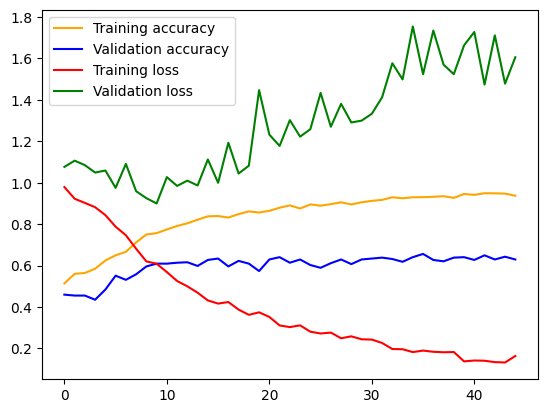

In [32]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.figure()
plt.plot(history.history['accuracy'], 'orange', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
plt.plot(history.history['loss'], 'red', label='Training loss')
plt.plot(history.history['val_loss'], 'green', label='Validation loss')
plt.legend()
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


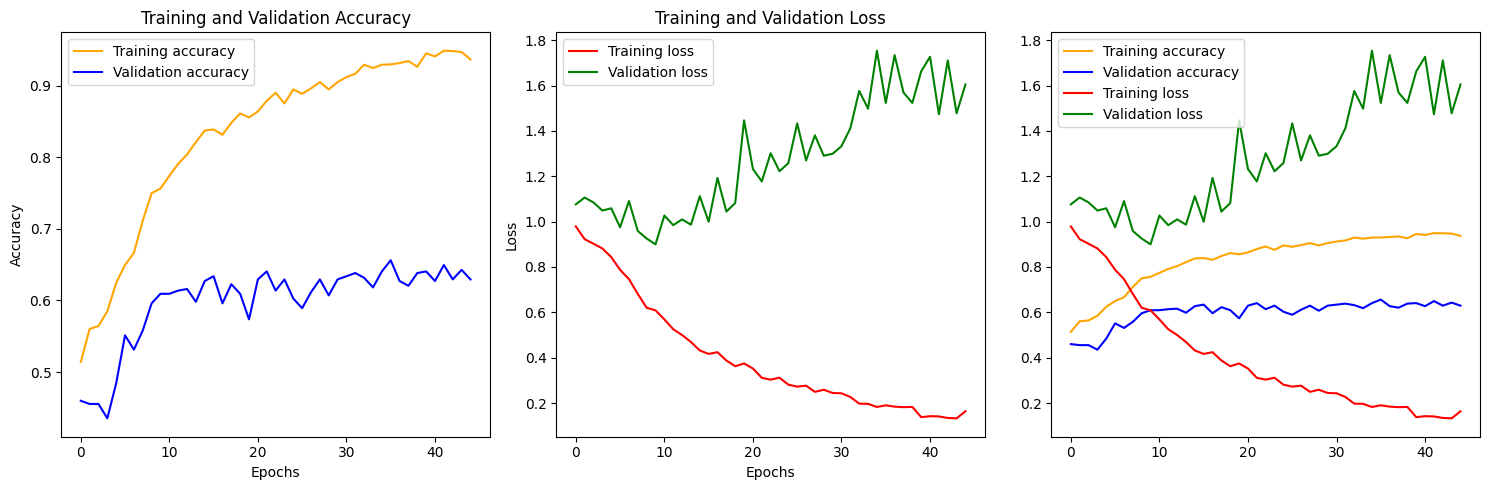

In [52]:
import matplotlib.pyplot as plt

print(history.history.keys())

# Extracting data
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting Accuracy
axes[0].plot(training_accuracy, color='orange', label='Training accuracy')
axes[0].plot(validation_accuracy, color='blue', label='Validation accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plotting Loss
axes[1].plot(training_loss, color='red', label='Training loss')
axes[1].plot(validation_loss, color='green', label='Validation loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Plotting the provided plot
axes[2].plot(history.history['accuracy'], 'orange', label='Training accuracy')
axes[2].plot(history.history['val_accuracy'], 'blue', label='Validation accuracy')
axes[2].plot(history.history['loss'], 'red', label='Training loss')
axes[2].plot(history.history['val_loss'], 'green', label='Validation loss')
axes[2].legend()

plt.tight_layout()
plt.show()


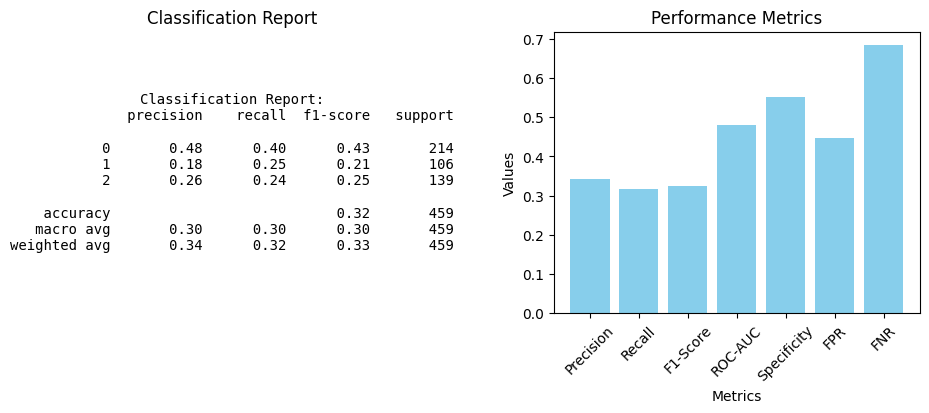

In [49]:
import matplotlib.pyplot as plt

# Classification Report
classification_report = """
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.40      0.43       214
           1       0.18      0.25      0.21       106
           2       0.26      0.24      0.25       139

    accuracy                           0.32       459
   macro avg       0.30      0.30      0.30       459
weighted avg       0.34      0.32      0.33       459
"""

plt.figure(figsize=(10, 8))

# Plotting Classification Report
plt.subplot(2, 2, 1)
plt.text(0.5, 0.5, classification_report, fontsize=10, fontfamily='monospace', ha='center', va='center')
plt.title('Classification Report')
plt.axis('off')

# Metrics
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Specificity', 'FPR', 'FNR']
values = [0.3421, 0.3159, 0.3254, 0.4812, 0.5519, 0.4481, 0.6841]

# Plotting Metrics
plt.subplot(2, 2, 2)
plt.bar(metrics, values, color='skyblue')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-labels for better readability

plt.tight_layout(pad=3)
plt.show()
